#student mental health
The dataset comprises time-stamped questionnaire responses, predominantly from college students. It encompasses various attributes, including:

1. **Timestamp**: Records the date and time when survey responses were collected.

2. **Gender**: Classifies respondents as either male or female.

3. **Age**: Offers insights into the age distribution of the respondents.

4. **Course of Study**: Identifies the academic field in which respondents are enrolled.

5. **Current Year of Study**: Specifies the academic level at which respondents currently find themselves.

6. **CGPA (Cumulative Grade Point Average)**: Categorizes academic performance into distinct ranges.

7. **Marital Status**: Segregates respondents as either married (Yes) or unmarried (No).

8. **Depression, Anxiety, Panic Attack**: Binary indicators (Yes/No) revealing whether respondents report experiencing these mental health conditions.

9. **Seeking Specialist Treatment**: Binary markers (Yes/No) signaling whether respondents have sought treatment from mental health specialists.

This dataset is well-suited for conducting exploratory data analysis (EDA) to gain insights into the academic and mental health attributes of the surveyed students.

In [546]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [547]:
df = pd.read_csv("/content/Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [548]:
df1=df.copy()

In [549]:
df1.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [550]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [551]:
df1['Age'].isnull().sum()

0

In [552]:
df1.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [553]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [554]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

In [555]:
df1 = df1.rename(columns={'What is your CGPA?': 'CGPA'})
df1 = df1.rename(columns={'What is your course?': 'Course'})
df1 = df1.rename(columns={'Do you have Depression?': 'Depression'})
df1 = df1.rename(columns={'Do you have Anxiety?': ' Anxiety'})
df1 = df1.rename(columns={'Do you have Panic attack?': 'Panic Attack'})
df1 = df1.rename(columns={'Did you seek any specialist for a treatment?': 'Treatment'})
df1 = df1.rename(columns={'Your current year of Study': 'year'})
df1 = df1.rename(columns={'Choose your gender': 'Gender'})

In [556]:
df1['Age'] = df1['Age'].astype(int)


In [557]:
df1.head()

,Timestamp,Gender,Age,Course,year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment
0,2020-08-07 12:02:00,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07 12:04:00,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07 12:05:00,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-08-07 12:06:00,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-08-07 12:13:00,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [558]:
df1 = pd.get_dummies(df1, columns = ['Marital status'], drop_first = True)
df1 = pd.get_dummies(df1, columns = ['Depression'], drop_first = True)
df1 = pd.get_dummies(df1, columns = ['Gender'],drop_first = True)
df1 = pd.get_dummies(df1, columns = ['Panic Attack'], drop_first = True)
df1 = pd.get_dummies(df1, columns = ['Treatment'], drop_first = True)
#df1 = pd.get_dummies(df1, columns = ['Anxiety'], drop_first = True)

In [559]:
df1.head()

,Timestamp,Age,Course,year,CGPA,Anxiety,Marital status_Yes,Depression_Yes,Gender_Male,Panic Attack_Yes,Treatment_Yes
0,2020-08-07 12:02:00,18,Engineering,year 1,3.00 - 3.49,No,0,1,0,1,0
1,2020-08-07 12:04:00,21,Islamic education,year 2,3.00 - 3.49,Yes,0,0,1,0,0
2,2020-08-07 12:05:00,19,BIT,Year 1,3.00 - 3.49,Yes,0,1,1,1,0
3,2020-08-07 12:06:00,22,Laws,year 3,3.00 - 3.49,No,1,1,0,0,0
4,2020-08-07 12:13:00,23,Mathemathics,year 4,3.00 - 3.49,No,0,0,1,0,0


In [560]:

df1 = df1.rename(columns={'Depression_Yes': 'Depression'})
df1 = df1.rename(columns={'Anxiety': ' Anxiety'})
df1 = df1.rename(columns={'Panic attack_Yes': 'Panic Attack'})
df1 = df1.rename(columns={'treatment_Yes?': 'Treatment'})
df1 = df1.rename(columns={'gender_Male': 'Gender'})

In [561]:
df1.head()

,Timestamp,Age,Course,year,CGPA,Anxiety,Marital status_Yes,Depression,Gender_Male,Panic Attack_Yes,Treatment_Yes
0,2020-08-07 12:02:00,18,Engineering,year 1,3.00 - 3.49,No,0,1,0,1,0
1,2020-08-07 12:04:00,21,Islamic education,year 2,3.00 - 3.49,Yes,0,0,1,0,0
2,2020-08-07 12:05:00,19,BIT,Year 1,3.00 - 3.49,Yes,0,1,1,1,0
3,2020-08-07 12:06:00,22,Laws,year 3,3.00 - 3.49,No,1,1,0,0,0
4,2020-08-07 12:13:00,23,Mathemathics,year 4,3.00 - 3.49,No,0,0,1,0,0


In [562]:
duplicate_rows=df1.duplicated()
display(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

<ipython-input-563-41783968a78a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


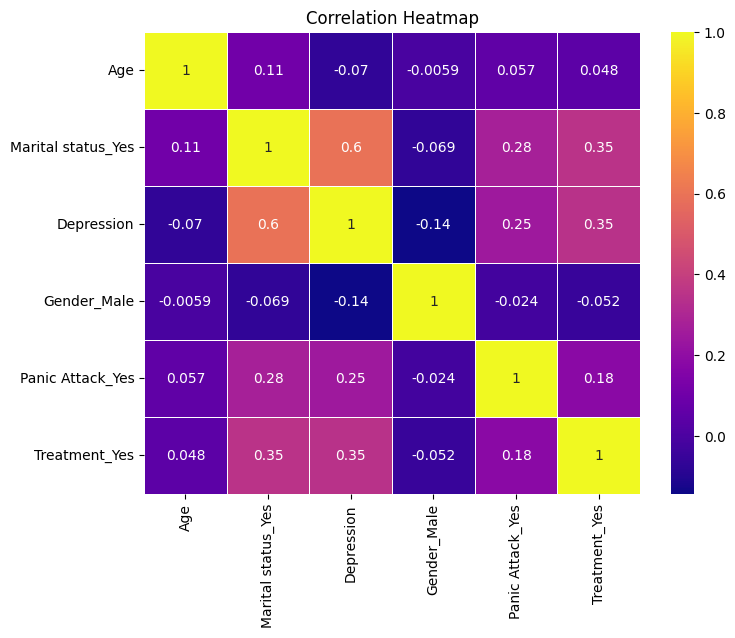

In [563]:
correlation_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


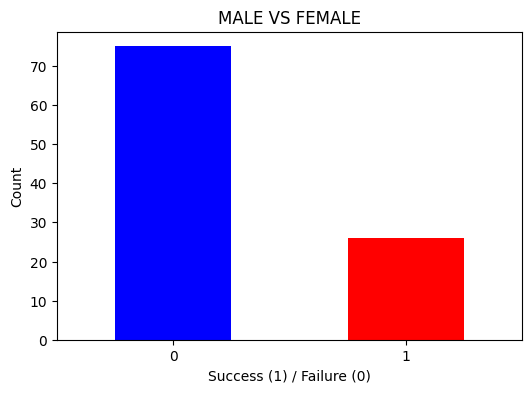

In [564]:
success_counts = df1['Gender_Male'].value_counts()
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('MALE VS FEMALE')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

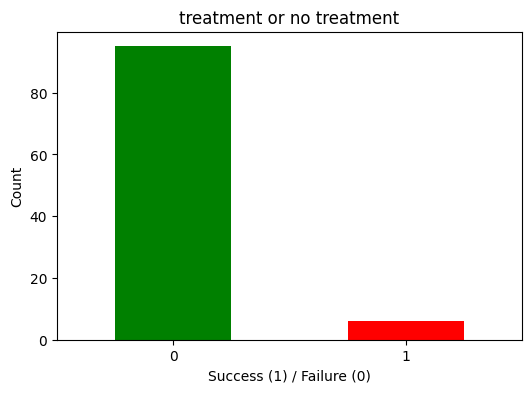

In [565]:
success_counts = df1['Treatment_Yes'].value_counts()
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('treatment or no treatment')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [566]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
graph = ['Age',]  # replace this with your actual numerical columns

for column in graph:
    df[column] = scaler.fit_transform(df[[column]])

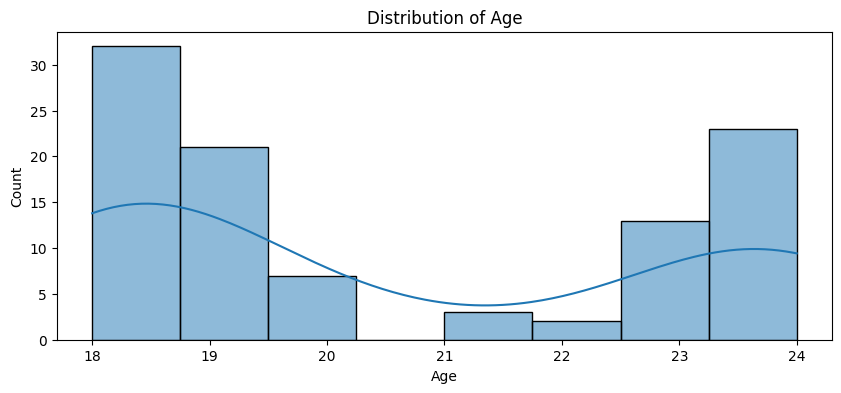

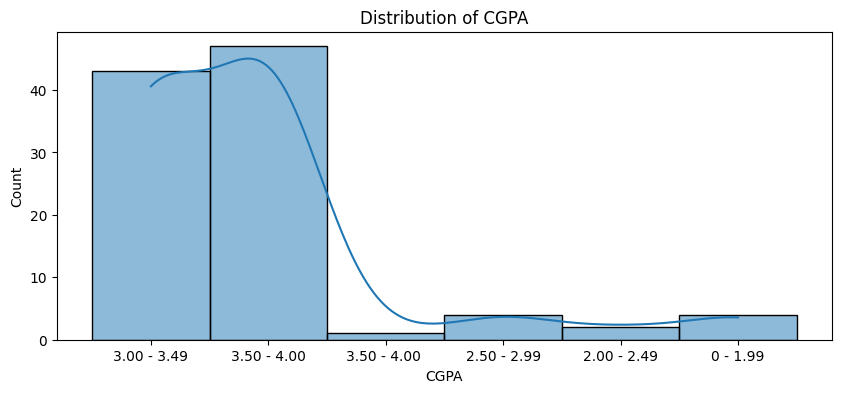

In [567]:
graph2 = ['Age', 'CGPA']

for column in graph2:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df1, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

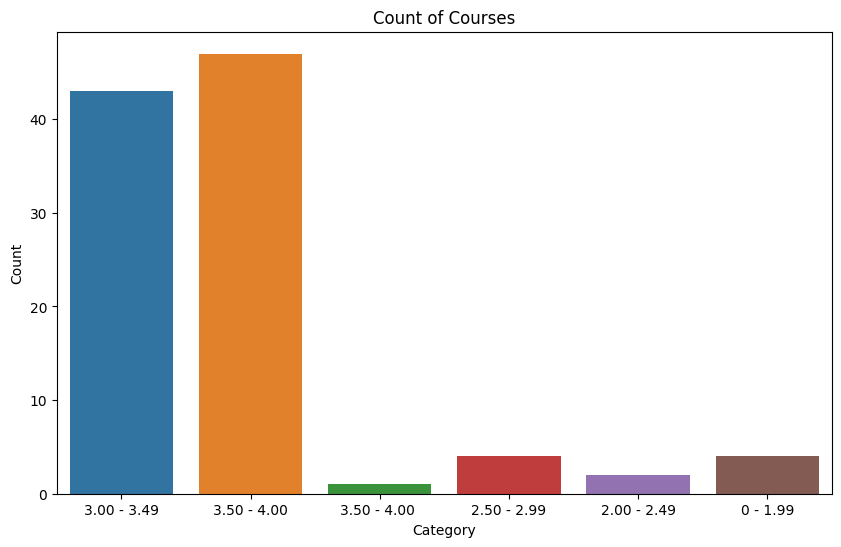

In [568]:
plt.figure(figsize=(10, 6))
sns.countplot(df1, x='CGPA')
plt.title('Count of Courses')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [569]:
df1.head(2)

,Timestamp,Age,Course,year,CGPA,Anxiety,Marital status_Yes,Depression,Gender_Male,Panic Attack_Yes,Treatment_Yes
0,2020-08-07 12:02:00,18,Engineering,year 1,3.00 - 3.49,No,0,1,0,1,0
1,2020-08-07 12:04:00,21,Islamic education,year 2,3.00 - 3.49,Yes,0,0,1,0,0


In [570]:
df['CGPA'] = df['What is your CGPA?'].map({
    '3.00 - 3.49': 3.25,
    '3.50 - 3.99': 3.75,
    '2.50 - 2.99': 2.75,
    '2.00 - 2.49': 2.25,
    '1.50 - 1.99': 1.75,
    '1.00 - 1.49': 1.25,
    '0.50 - 0.99': 0.75,
    '0.00 - 0.49': 0.25
})

df = df.drop('What is your CGPA?', axis=1)

In [571]:
# Convert 'Your current year of Study' to a numerical value
df1['Study Year'] = df1['year'].map({
    'year 1': 1,
    'year 2': 2,
    'year 3': 3,
    'year 4': 4
    # Add more years if necessary
})

In [572]:
# Create a new feature that counts the total number of mental health issues each student has
df['Total Mental Health Issues'] = df['Do you have Depression?'] + df['Do you have Anxiety?'] + df['Do you have Panic attack?']

In [573]:
# Define feature matrix X and target vector y
X = df.drop('Total Mental Health Issues', axis=1)
y = df['Total Mental Health Issues']

In [574]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [575]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [576]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [577]:
num_columns = ['Age']
cat_columns = ['Choose your gender', 'What is your course?', 'Your current year of Study', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

In [578]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
num_imputer = SimpleImputer(strategy='median')
X_train[num_columns] = num_imputer.fit_transform(X_train[num_columns])
X_test[num_columns] = num_imputer.transform(X_test[num_columns])

# Impute missing values with the most frequent category for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_columns] = cat_imputer.fit_transform(X_train[cat_columns])
X_test[cat_columns] = cat_imputer.transform(X_test[cat_columns])

In [579]:
df1["CGPA"].isnull().sum()

0

In [580]:
X_train

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA
89,13/07/2020 11:54:58,Male,1.000000,Engineering,Year 2,No,No,No,Yes,No,2.25
26,8/7/2020 13:35,Female,0.166667,Engineering,year 1,No,No,No,No,No,NaN
42,8/7/2020 14:58,Female,0.333333,Usuluddin,year 2,No,Yes,No,No,No,3.25
70,8/7/2020 20:36,Female,1.000000,Biomedical science,year 1,No,No,No,No,No,3.25
15,8/7/2020 12:43,Male,1.000000,BCS,Year 3,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,8/7/2020 16:34,Female,0.000000,IT,Year 3,No,No,No,Yes,No,3.25
71,8/7/2020 21:21,Female,0.000000,Laws,Year 3,No,No,No,Yes,No,NaN
14,8/7/2020 12:43,Female,0.000000,KENMS,Year 2,No,No,Yes,No,No,NaN
92,13/07/2020 14:48:05,Female,0.166667,KOE,year 2,Yes,Yes,No,No,No,3.25


In [581]:
y_train

89    NoNoYes
26     NoNoNo
42    YesNoNo
70     NoNoNo
15     NoNoNo
       ...   
60    NoNoYes
71    NoNoYes
14    NoYesNo
92    YesNoNo
51    NoYesNo
Name: Total Mental Health Issues, Length: 80, dtype: object

In [582]:
column_name = 'Timestamp'
df = df.drop(column_name, axis=1)

In [583]:
y_train = pd.get_dummies(y_train)

In [584]:
'''y_train = "3.14159"
float_value = float(y_train)
print(float_value)'''


'y_train = "3.14159"\nfloat_value = float(y_train)\nprint(float_value)'

In [585]:
median_value = X_train['CGPA'].mode()
X_train['CGPA'].fillna(median_value, inplace=True)
X_test['CGPA'].fillna(median_value, inplace=True)

In [586]:
X_train = X_train.drop('Your current year of Study', axis=1)
X_test = X_test.drop('Your current year of Study', axis=1)

In [587]:
# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [597]:
# Define a function to calculate and print the evaluation metrics
def print_evaluation_metrics(y_test, y_pred, average='micro'):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average=average)}")
    print(f"Recall: {recall_score(y_test, y_pred, average=average)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average=average)}")

In [589]:
df1.head()

,Timestamp,Age,Course,year,CGPA,Anxiety,Marital status_Yes,Depression,Gender_Male,Panic Attack_Yes,Treatment_Yes,Study Year
0,2020-08-07 12:02:00,18,Engineering,year 1,3.00 - 3.49,No,0,1,0,1,0,1.0
1,2020-08-07 12:04:00,21,Islamic education,year 2,3.00 - 3.49,Yes,0,0,1,0,0,2.0
2,2020-08-07 12:05:00,19,BIT,Year 1,3.00 - 3.49,Yes,0,1,1,1,0,NaN
3,2020-08-07 12:06:00,22,Laws,year 3,3.00 - 3.49,No,1,1,0,0,0,3.0
4,2020-08-07 12:13:00,23,Mathemathics,year 4,3.00 - 3.49,No,0,0,1,0,0,4.0


In [591]:
df1 = df1.drop(columns =['Timestamp', "Course"], axis = 1)

In [592]:
df1.head()

,Age,year,CGPA,Anxiety,Marital status_Yes,Depression,Gender_Male,Panic Attack_Yes,Treatment_Yes,Study Year
0,18,year 1,3.00 - 3.49,No,0,1,0,1,0,1.0
1,21,year 2,3.00 - 3.49,Yes,0,0,1,0,0,2.0
2,19,Year 1,3.00 - 3.49,Yes,0,1,1,1,0,NaN
3,22,year 3,3.00 - 3.49,No,1,1,0,0,0,3.0
4,23,year 4,3.00 - 3.49,No,0,0,1,0,0,4.0


In [593]:
array=np.array(df1) #converting the dataframe into an array
array

array([[18, 'year 1', '3.00 - 3.49', ..., 1, 0, 1.0],
       [21, 'year 2', '3.00 - 3.49', ..., 0, 0, 2.0],
       [19, 'Year 1', '3.00 - 3.49', ..., 1, 0, nan],
       ...,
       [19, 'Year 3', '3.50 - 4.00', ..., 1, 0, nan],
       [23, 'year 4', '3.50 - 4.00', ..., 0, 0, 4.0],
       [20, 'Year 2', '3.00 - 3.49', ..., 0, 0, nan]], dtype=object)

In [594]:
X1= array[:,0:1] #dividing the test and training set
X1 #target data

array([[18],
       [21],
       [19],
       [22],
       [23],
       [19],
       [23],
       [18],
       [19],
       [18],
       [20],
       [24],
       [18],
       [19],
       [18],
       [24],
       [24],
       [24],
       [20],
       [18],
       [19],
       [18],
       [24],
       [24],
       [23],
       [18],
       [19],
       [18],
       [24],
       [24],
       [23],
       [18],
       [19],
       [18],
       [19],
       [18],
       [18],
       [19],
       [18],
       [24],
       [24],
       [22],
       [20],
       [20],
       [23],
       [18],
       [19],
       [18],
       [24],
       [24],
       [23],
       [18],
       [19],
       [20],
       [19],
       [21],
       [23],
       [20],
       [18],
       [23],
       [18],
       [19],
       [18],
       [24],
       [24],
       [23],
       [18],
       [19],
       [18],
       [24],
       [24],
       [18],
       [19],
       [18],
       [24],
       [24],
       [23],

In [595]:
Y1= array[:,1:] #training data/dataset
Y1

array([['year 1', '3.00 - 3.49', 'No', 0, 1, 0, 1, 0, 1.0],
       ['year 2', '3.00 - 3.49', 'Yes', 0, 0, 1, 0, 0, 2.0],
       ['Year 1', '3.00 - 3.49', 'Yes', 0, 1, 1, 1, 0, nan],
       ['year 3', '3.00 - 3.49', 'No', 1, 1, 0, 0, 0, 3.0],
       ['year 4', '3.00 - 3.49', 'No', 0, 0, 1, 0, 0, 4.0],
       ['Year 2', '3.50 - 4.00', 'No', 0, 0, 1, 1, 0, nan],
       ['year 2', '3.50 - 4.00 ', 'No', 1, 1, 0, 1, 0, 2.0],
       ['year 1', '3.50 - 4.00', 'Yes', 0, 0, 0, 0, 0, 1.0],
       ['Year 2', '2.50 - 2.99', 'No', 0, 0, 0, 0, 0, nan],
       ['year 1', '3.50 - 4.00', 'Yes', 0, 0, 1, 1, 0, 1.0],
       ['year 1', '3.50 - 4.00', 'No', 0, 0, 0, 0, 0, 1.0],
       ['Year 3', '3.50 - 4.00', 'No', 1, 1, 0, 0, 0, nan],
       ['year 1', '3.00 - 3.49', 'No', 0, 1, 0, 0, 0, 1.0],
       ['year 1', '3.00 - 3.49', 'No', 0, 0, 1, 0, 0, 1.0],
       ['Year 2', '3.50 - 4.00', 'Yes', 0, 0, 0, 0, 0, nan],
       ['Year 3', '3.50 - 4.00', 'No', 0, 0, 1, 0, 0, nan],
       ['year 3', '3.00 - 3.49', '